<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">


# Web Scraping for Indeed.com and Predicting Salaries

In [25]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df_cleaned = pd.read_csv('/Users/harmeetgill/Documents/Jobs/General_assembly/Github_repos/DSI15-project-submissions/Harmeet-Gill/project-4/df_to_clean_v2 copy.csv')

# Modelling location

In [3]:
#set X and target
X=df_cleaned[['Location']]
y=df_cleaned['High or low (50%)']

In [4]:
#dummification of location feature
X=pd.get_dummies(X, drop_first = True)

In [5]:
print(X.shape)
print(y.shape)

(1250, 204)
(1250,)


In [6]:
#train, test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1000, 204)
(250, 204)
(1000,)
(250,)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(stop_words='english')

cvec.fit(df_cleaned['Title clean'])

cvec_transf = cvec.transform(df_cleaned['Title clean'])



In [11]:
sparse_array = cvec_transf.toarray()
df=pd.DataFrame(sparse_array, columns=cvec.get_feature_names())

In [12]:
title_vec = df.transpose().sort_values(0, ascending=False).transpose()

In [13]:
title_vec.shape

(1250, 1143)

In [14]:
final_df = pd.concat([X_train, title_vec], axis=1)

# Logistic regression gridsearch for location

### Executing model

In [15]:
model = LogisticRegression(random_state=1)

from sklearn.model_selection import GridSearchCV

params = {'C': np.logspace(-4, 4, 10),
          'penalty': ['l1', 'l2'],
          'solver' : ['liblinear'],
          'fit_intercept' : [True, False]}

gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  verbose=1)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/harmeetgill/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best Parameters:
{'C': 0.3593813663804626, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}
Best estimator C:
0.3593813663804626
Best estimator mean cross validated training score:
0.5980000000000001
Best estimator score on the full training set:
0.638
Best estimator score on the test set:
0.64
Best estimator coefficients:
[[ 0.         -0.13647659  0.         -0.13647659 -0.35546276  0.
  -0.13647659  0.56658019  0.05359376 -0.13647659 -0.25345163 -0.13647659
  -0.09888641  0.05359376  0.51325081  0.19403563 -0.44572619 -0.29131707
  -0.13647659  0.         -0.35546276 -0.13647659  0.19403563 -0.13647659
   0.05359376 -0.13647659 -0.13647659 -0.09843934 -0.13647659 -0.13647659
  -0.13647659 -0.35546276  0.         -0.13647659  0.71172284  0.19403563
   0.19403563 -0.13647659  0.19403563 -0.25345163  0.         -0.47898852
  -0.0676676  -0.13647659  0.19403563  0.19403563  0.          0.27976555
   0.          0.19403563  0.19403563  0.35857677 -0.13647659  0.19403563
   

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.5s finished


### Saving logistic regression

In [18]:
#save model as joblib file
import joblib

# joblib.dump(gs, 'log_reg_gs_location.jlib')

['log_reg_gs_location.jlib']

In [20]:
#load file
gs=joblib.load('log_reg_gs_location.jlib')

### Evaluating logistic regression

In [ ]:
# extract the grid search results
print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test, y_test))
print('Best estimator coefficients:')
print(gs.best_estimator_.coef_)

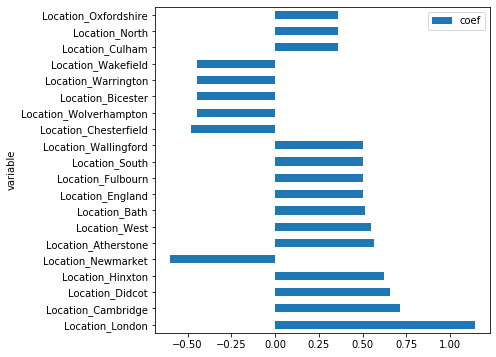

In [33]:
#plot coefficients
coefs_lr = pd.DataFrame({
    'coef': gs.best_estimator_.coef_[0],
    'variable': X.columns,
    'abscoef': np.abs(gs.best_estimator_.coef_[0])
})

top_twenty = coefs_lr.sort_values('abscoef', ascending=False).head(20)
top_twenty.plot(kind='barh', x='variable', y='coef',
                       figsize=(6, 6))
plt.show()

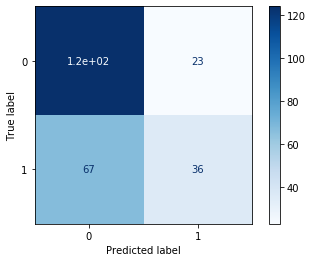

In [37]:
from sklearn.metrics import  plot_confusion_matrix
plot_confusion_matrix(gs, X_test, y_test, cmap=plt.cm.Blues);

# KNN gridsearch for location

### Executing model

In [63]:
#KNN FOR LOCATION ONLY

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV


knn_params = {
    'n_neighbors': [5, 9, 15, 25, 40, 50, 60],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']}
knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, knn_params, cv=5, verbose=1)

knn_gs.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 9, 15, 25, 40, 50, 60],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

### Saving KNN model

In [51]:
#save model as joblib file
import joblib

# joblib.dump(knn_gs, 'knn_gs.jlib')

['knn_gs.jlib']

In [52]:
#load KNN model
knn_gs=joblib.load('knn_gs.jlib')

### KNN evaluation metrics

In [64]:
# extract the grid search results

print('Best Parameters:')
print(knn_gs.best_params_)
print('Best estimator mean cross validated training score:')
print(knn_gs.best_score_)
print('Best estimator score on the full training set:')
print(knn_gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(knn_gs.score(X_test, y_test))

Best Parameters:
{'metric': 'euclidean', 'n_neighbors': 40, 'weights': 'distance'}
Best estimator mean cross validated training score:
0.594
Best estimator score on the full training set:
0.679
Best estimator score on the test set:
0.608


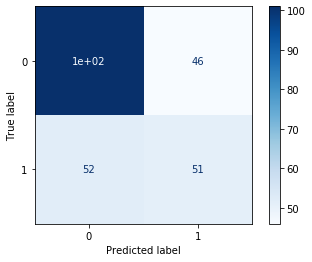

In [66]:
from sklearn.metrics import  plot_confusion_matrix
plot_confusion_matrix(knn_gs, X_test, y_test, cmap=plt.cm.Blues);

# Logistic regression gridsearch for location and salary

### Setting parameters

In [ ]:
X=df_cleaned[['Location', 'Salary_freq']]
y=df_cleaned['High or low (50%)']

X=pd.get_dummies(X, drop_first = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Executing logistic regression model

In [ ]:
model = LogisticRegression(random_state=1)

from sklearn.model_selection import GridSearchCV

params = {'C': np.logspace(-4, 4, 10),
          'penalty': ['l1', 'l2'],
          'solver' : ['liblinear'],
          'fit_intercept' : [True, False]}

gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  verbose=1)

gs.fit(X_train, y_train)

### Saving logistic regression model

In [ ]:
#save model as joblib file
import joblib

joblib.dump(gs, 'lr_gs_loc_salary.jlib')

In [ ]:
#load KNN model
lr_gs_loc_salary=joblib.load('lr_gs_loc_salary.jlib')

### Evaluating logistic regression

In [ ]:
# extract the grid search results
print('Best Parameters:')
print(lr_gs_loc_salary.best_params_)
print('Best estimator C:')
print(lr_gs_loc_salary.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(lr_gs_loc_salary.best_score_)
print('Best estimator score on the full training set:')
print(lr_gs_loc_salary.score(X_train, y_train))
print('Best estimator score on the test set:')
print(lr_gs_loc_salary.score(X_test, y_test))
print('Best estimator coefficients:')
print(lr_gs_loc_salary.best_estimator_.coef_)

In [ ]:
#plot coefficients
coefs_lr = pd.DataFrame({
    'coef': lr_gs_loc_salary.best_estimator_.coef_[0],
    'variable': X.columns,
    'abscoef': np.abs(lr_gs_loc_salary.best_estimator_.coef_[0])
})

top_twenty = coefs_lr.sort_values('abscoef', ascending=False).head(20)
top_twenty.plot(kind='barh', x='variable', y='coef',
                       figsize=(6, 6))
plt.show()

In [ ]:
plot_confusion_matrix(lr_gs_loc_salary, X_test, y_test, cmap=plt.cm.Blues);

# KNN gridsearch for location and salary

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV


knn_params = {
    'n_neighbors': [5, 9, 15, 25, 40, 50, 60],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']}
knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, knn_params, cv=5, verbose=1)

knn_gs.fit(X_train, y_train)

# extract the grid search results

print('Best Parameters:')
print(knn_gs.best_params_)
print('Best estimator mean cross validated training score:')
print(knn_gs.best_score_)
print('Best estimator score on the full training set:')
print(knn_gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(knn_gs.score(X_test, y_test))

In [ ]:
X=df_cleaned[['Location', 'Salary_freq', 'Title']]
X=pd.get_dummies(X, drop_first = True)

y=df_cleaned['High or low (50%)']

X = pd.concat([X, title_vec], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
#LOGISTIC REGRESSION FOR LOCATION AND SALARY FREQ AND TITLE

model = LogisticRegression(random_state=1)

from sklearn.model_selection import GridSearchCV

params = {'C': np.logspace(-4, 4, 10),
          'penalty': ['l1', 'l2'],
          'solver' : ['liblinear'],
          'fit_intercept' : [True, False]}

gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  verbose=1)

gs.fit(X_train, y_train)

# extract the grid search results

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test, y_test))
print('Best estimator coefficients:')
print(gs.best_estimator_.coef_)



In [ ]:
pd.set_option('display.max_rows', 500)
coef4 = pd.DataFrame(zip(X_train.columns, np.transpose(gs.best_estimator_.coef_)), columns=['features', 'coef'])
coef4.sort_values(by='coef', ascending = False)

In [ ]:
#KNN FOR LOCATION AND SALARY FREQ AND TITLE

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV


knn_params = {
    'n_neighbors': [5, 9, 15, 25, 40, 50, 60],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']}
knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, knn_params, cv=5, verbose=1)

knn_gs.fit(X_train, y_train)

# extract the grid search results

print('Best Parameters:')
print(knn_gs.best_params_)
print('Best estimator mean cross validated training score:')
print(knn_gs.best_score_)
print('Best estimator score on the full training set:')
print(knn_gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(knn_gs.score(X_test, y_test))

**SUMMARY**

Scraping:

I webscraped for the following jobs: ‘Data Scientist, Data Analyst, Machine Learning’ over 15 cities. This resulted in 3543 jobs, with different salaries, in terms of salaries with ranges, annual, monthly, weekly and daily salaries. 

Cleaning salaries:
The salary integers needed to be extracted, but also the information of what period the salary referred to also needed to be retained. Therefore, first cleaned the salaries to isolate the integers and split those integers into Min/Max salary and ‘Salary Period’ columns. The salary info wasn’t always a clean split, so the ‘Salary Period’ column sometimes remained empty. Therefore, I made a new column by taking the original salary column and if the period (year, month etc.) was mentioned, then this was added into the ‘Salary freq’ column.The remaining salaries in the min/max columns were then converted to floats. Next, I averaged the salaries to normalise the data so I only had one figure to deal with. To further normalise the salaries, the means were all converted to yearly salaries by multiplying the figure with the appropriate number (eg for monthly salaries the figure was multiplied by 12). Next, redundant columns were dropped (original salary, salary period, min, max).

Cleaning locations:
Some of the locations also contained postcodes, so these were removed by using .split and concatenating only the city into the original df.

Cleaning titles and companies:
I removed non-alphanumeric characters as best as I could and made them lowercase.

CVEC:
I spent time cleaning the titles so that the when I apply cvec, it would pick up the maximum number of terms. Ideally I would have liked to check more thoroughly somehow whether the strings were properly cleaned up.

EDA:
I checked the normalised salary distribution using a box plot, the data was very skewed. Ideally I would have liked to check whether my normalisation steps were correct. For example, should did I scale the salaries to yearly the correct way? Hourly salaries will probably need further normalisation because hourly rates tend to be higher. In addition, I would have liked to remove outliers.

Salary median:
As the data was so skewed, I would have liked to run the modelling on a range of percentiles. But I only had time to run the model on the median.

Modelling: Location only 
Logistic regression (model 1):
First, I ran logistic regression with a gridsearch on only location. The mean cv, train and test scores were between (0.72 and 0.78). The location which influences salary the most is London, which is not surprising London salaries tend to have higher salaries to account to cost of living. This is followed by Cambridge and Cambridgeshire, which also has a high cost of living. Next is Apsley which is in Hertfordshire. This is an outlier as the job that this refers to pays £500 a day, which would not translate into a yearly salary (unfortunately!). Therefore, this confirms that the scaling up of salaries needs to be looked at more closely. Also, it would have been useful to consolidate smaller towns into cities. The general trend is that London and Cambridge jobs pay well, while some areas in the North (e.g. Rotherham, Barnsley) pay the least well.

KNN classifier (model 2):
Second, I ran a KNN classifier with a gridsearch on only location. The mean cv, train and test scores were between (0.72 and 0.76), which were very slightly worse than model 1. 

Modelling: Location and Salary frequency:
Logistic regression (model 3):
Logistic regression with a gridsearch on location and salary frequency. The mean cv, train and test scores were between (0.78 and 0.8). As this model took more X variables, it’s predictive strength also increased slightly compared to Model 1. However,  This df revealed a problem - when I cleaned the locations, I missed locations with more than 1 string in them. Therefore, locations such as ‘High’ and ‘South’ are included in the coefficients df. I would have to go back and add these location in properly. 

Monthly salary frequency seems to be a stronger predictor than yearly, followed by weekly and then hourly. In addition, this model also confirms Cambridgeshire to be a strong predictor of salary. Interestingly, London is less predictive than Cambridge, in contradiction to model 1. I think this means that salary frequency is skewing the location data, which means that salary frequency might not be the best predictor to use.

KNN classifier (model 4):
Next, I ran a KNN classifier with a gridsearch on salary frequency and location. The mean cv, train and test scores were between (0.78 and 0.82), which were very slightly worse than model 1. This model was comparable to model 3.

Modelling: Location and Salary frequency and title:
Logistic regression (model 5):
Logistic regression with a gridsearch on location, salary frequency and title. The mean cv, train and test scores were between (0.92 and 0.98). The model score considerably improved with the addition of title. Job titles with ‘tutor’ is the strongest predictor of salary. This is probably because tutors are paid hourly. The second job title is ‘director’ which again will be an anomaly as directors have a higher than average salary. 

It is difficult to derive information of use from this df, as the strings making up the job title have been split up. It would have been useful to join the strings to begin with (ie ‘data scientist’ or ‘dataanalyst’).

Conclusion:

These models in their current state are not usable due to the reasons already mentioned. It would have been useful to visually explore the cleaned data more and remove redundant terms. In addition, the use of other models would have been useful. Other methods to interrogate predictive power would have been useful, for example a confusion matrix and ROC curve to display true/false positive rates and true/false negative rates of the models. Therefore, while the scores are reasonably high, I would want to explore the data further before deriving any conclusions. 





